In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [29]:
## All the funcions:

# EMA formula
def EMA(N, start_index, values):
    if (start_index - N < 0 or start_index >= len(values)):
        raise Exception("Index out of bounds!")
    
    multiplier = 0
    divisor = 0
    power = 0
    smoothing = 2 / (N + 1) # Smoothing factor, used in EMA function

    # We iterate over N elements in a reversed direction
    for index in range(start_index, start_index - N, -1):
        multiplier += values[index] * smoothing**power
        divisor += smoothing**power
        power += 1

    return multiplier/divisor

# EMA values list for n last elements
def EMA_values(N, n_elements, values):
    size = len(values)

    ema_values = []

    if n_elements > size:
        raise Exception("List length is smaller than number of elements!")
    
    start_index = size - n_elements

    #calculate ema for each element in the "scope"
    for index in range(start_index, size):
        ema_values.append(EMA(N, index, values))

    return ema_values

# MACD = EMA12 - EMA26
def MACD(n_elements, values):
    size = len(values)

    macd_values = []

    if n_elements > size:
        raise Exception("List length is smaller than number of elements!")

    ema12_values = EMA_values(12, n_elements, values)
    ema26_values = EMA_values(26, n_elements, values)

    #calculate ema difference for each element in the "scope"
    for index in range(0, n_elements):
        macd_values.append(ema12_values[index] - ema26_values[index])

    return macd_values

<bound method DataFrame.info of             time     Open     High      Low    Close      Volume
0     2021-01-01    1.510    1.865    1.495    1.847  1125773.54
1     2021-01-02    1.847    2.012    1.752    1.799  1060347.35
2     2021-01-03    1.799    2.808    2.007    2.185  1475936.63
3     2021-01-04    2.185    2.573    2.066    2.491  1543191.05
4     2021-01-05    2.491    2.634    2.145    2.158  1246011.66
...          ...      ...      ...      ...      ...         ...
1363  2024-09-25  152.720  153.880  147.300  147.970  1140072.57
1364  2024-09-26  147.970  158.030  146.590  155.580  1590861.37
1365  2024-09-27  155.580  161.240  154.010  157.640  1503547.66
1366  2024-09-28  157.640  159.400  155.080  156.780   576303.31
1367  2024-09-29  156.780  160.770  155.120  160.010   741062.22

[1368 rows x 6 columns]>


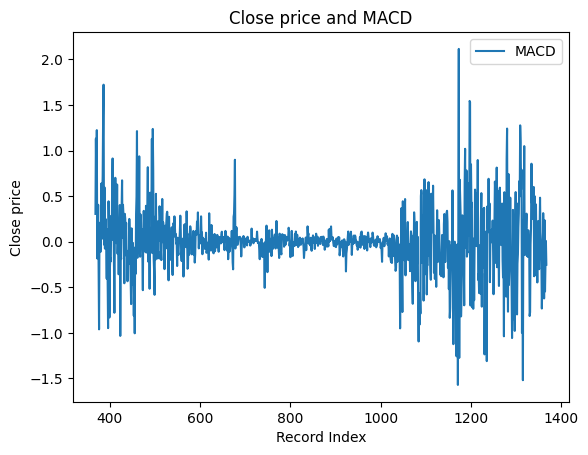

In [ ]:
## Main data import and variables creation

data_frame = pd.read_csv("Solana_daily_data_2021_2024.csv")
print(data_frame.info)

close_data = data_frame.get("Close").tolist()   # Price and the end of the day
time_data = data_frame.get("time").tolist()     # Corresponding days

n_records = len(close_data)
n_records_analyzed = 1000

x_full = np.arange(n_records)
x_analyzed = np.arange(n_records - n_records_analyzed, n_records)

plt.plot(x_full, close_data, label="Price")

macd_values = MACD(n_records_analyzed, close_data)

plt.plot(x_analyzed, macd_values, label="MACD")

plt.xlabel('Record Index')
plt.ylabel('Close price')
plt.title('Close price and MACD')
plt.legend()
plt.show()